In [9]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
DATA_DIR = r'E:\Projects\paddydisease'
IMG_SIZE = 64

In [4]:
def load_images(data_dir):
    X, y = [], []
    class_labels = os.listdir(data_dir)
    class_labels.sort()  # Ensure consistent label ordering
    label_map = {label: idx for idx, label in enumerate(class_labels)}
    for label in class_labels:
        class_dir = os.path.join(data_dir, label)
        # Skip if not a directory
        if not os.path.isdir(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img.flatten())
            y.append(label_map[label])
    return np.array(X), np.array(y), label_map

X, y, label_map = load_images(DATA_DIR)


In [5]:
X, y, label_map = load_images(DATA_DIR)

# === Step 2: Normalize and Split the Data ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# === Step 3: Apply PCA (Optional) ===
use_pca = True
if use_pca:
    pca = PCA(n_components=100)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    print(f"PCA reduced features to shape: {X_train.shape}")

PCA reduced features to shape: (12980, 100)


In [7]:
# === Step 4: Train SVM Classifier ===
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [38]:
# === Step 5: Evaluate the Model ===
y_pred = svm.predict(X_test)

In [39]:
print("\nClassification Report:")
# Only use the labels that actually appear in y_test
unique_labels = sorted(set(y_test))

print(classification_report(
    y_test,
    y_pred,
    labels=unique_labels,
    target_names=[list(label_map.keys())[i] for i in unique_labels]
))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.89      0.38      0.53       130
   bacterial_leaf_streak       0.96      0.85      0.90       101
bacterial_panicle_blight       0.95      0.67      0.78        90
        black_stem_borer       0.95      0.52      0.68       101
                   blast       0.74      0.82      0.78       470
              brown_spot       0.80      0.70      0.74       251
            downy_mildew       0.92      0.63      0.75       174
                   hispa       0.72      0.79      0.76       430
             leaf_roller       0.72      0.60      0.65       219
                  normal       0.67      0.86      0.75       481
                  tungro       0.64      0.82      0.72       390
        white_stem_borer       0.82      0.75      0.78       255
       yellow_stem_borer       0.89      0.74      0.81       153

                accuracy                          

In [40]:
# === Step 6: Plot Sample Predictions ===
def plot_samples(X, y_true, y_pred, n=9):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        img = X[i].reshape(IMG_SIZE, IMG_SIZE)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(
            f"True: {list(label_map.keys())[y_true[i]]}\n"
            f"Pred: {list(label_map.keys())[y_pred[i]]}"
        )
        plt.axis('off')
    plt.tight_layout()
    plt.show()

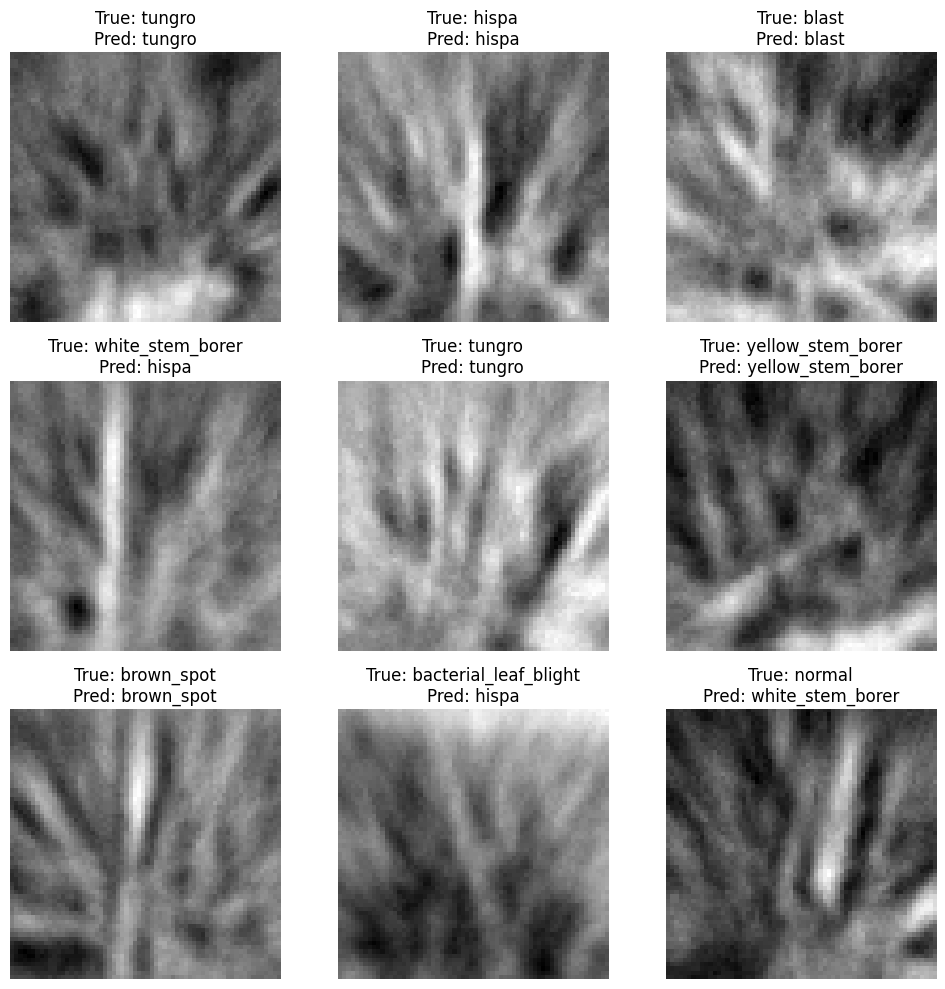

In [41]:
# === Show Test Results ===
if use_pca:
    # Approximate reconstruction for visualization
    X_test_vis = X_test @ pca.components_ + pca.mean_
else:
    X_test_vis = X_test

plot_samples(X_test_vis, y_test, y_pred)